In [20]:
# read csv file
import csv
import numpy as np
cor = np.loadtxt(open('coordinates.csv'), delimiter=",") #open the csv file as a matrix
print(cor)

[[ 148.  742.]
 [ 190.  659.]
 [ 232.  575.]
 [ 276.  503.]
 [ 318.  435.]
 [ 362.  376.]
 [ 405.  322.]
 [ 451.  278.]
 [ 496.  241.]
 [ 539.  211.]
 [ 584.  188.]
 [ 632.  174.]
 [ 679.  168.]
 [ 722.  170.]
 [ 767.  180.]
 [ 815.  197.]
 [ 858.  227.]
 [ 904.  260.]
 [ 951.  303.]
 [ 996.  354.]
 [1041.  411.]
 [1087.  477.]
 [1131.  552.]
 [1176.  634.]
 [1219.  722.]]


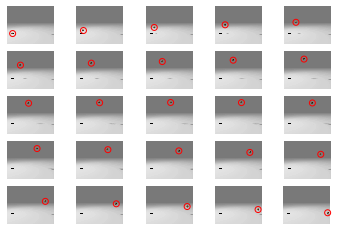

In [21]:
import matplotlib.pyplot as plt

for i in range(0,25): 
    plt.subplot(5,5,i+1) # display each of the 25 frames into a figure with 5 x 5 subplots
    img = plt.imread("frame"+str(i+1)+".png")
    plt.imshow(img) # display the image
    plt.axis('off')
    plt.scatter(cor[i][0],cor[i][1],facecolors='none', edgecolors='r')#Overlay the corresponding coordinate

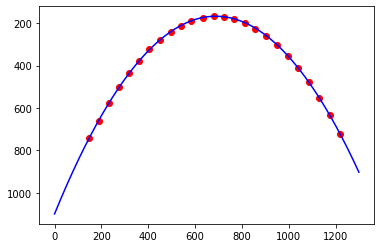

In [22]:
from numpy.linalg import inv
import matplotlib.pyplot as plt

# generate data
n = 25 # number of points
x = []
y=[]
for i in range(0,len(cor)):
    x.append(cor[i][0]) #make a list of all x-coordinates
    y.append(cor[i][1]) #make a list of all y-coordinates

# least-squares estimation 
X = np.stack( (np.square(x), x, np.ones((n))), axis=1) #set up the matrice
u = inv(np.transpose(X)@X)@np.transpose(X)@y #set u

# plot data and least-squares fit
xp = np.arange(0,1300,0.1)
yp = u[0]*xp*xp + u[1]*xp + u[2]
plt.plot(x,y,'ro') # original data
plt.plot( xp, yp, 'b-' ) # second-order polynomial fit
plt.gca().invert_yaxis() #reverse the vertical axis
plt.show()

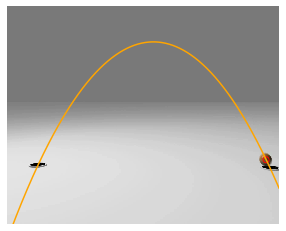

In [23]:
import time
from IPython.display import clear_output

for i in range(0,25):
    img=plt.imread("frame"+str(i+1)+".png") #display the frame
    plt.imshow(img) # display the image
    plt.scatter(cor[i][0],cor[i][1],facecolors='none', edgecolors='r')#Overlay the corresponding coordinate
    plt.plot(xp,yp,'orange') # second-order polynomial fit
    plt.xlim(0,1280) #set the x limits of the current axes
    plt.ylim(0,1024) #set the y limits of the current axes
    plt.axis('off') 
    plt.gca().invert_yaxis() #reverse the vertical axis
    time.sleep(0.5)
    clear_output(wait=True)
    plt.show()